# Simex NOVSL
This notebook runs `sumo_simulator_novsl` function which is modified to not use any VSL.

For running SUMO adjust the path in the `global_settings.py` file. The global_settings.py file also contains the parameters to be set for the simulation such as interval list. The following loop runs the selected sumo simulation for selected modifiers in the loop until it approximate every region or reaches the minimum step.
The sumo simulation function is defined in the `simulator.py` file.

## Important settings
1. Adjust the sumo path.
2. Setting the min/max domain interval and increment unit for the modifiers.
3. Setting the threshold for the validator and validator graph values.
4. Settings for the final plot with overall curves:
```python
"""Define variables for the settings of the Simex

    Attributes:
    instance_name (str): The settings instance name. No default value.
    do_plot: (bool): Enables plot in the modifier of the final modifier points. Default value is 'False'.
    extensive_search (bool): Enables complete exploration by setting modifier_data_point to 1 and enabling extensive iteration. Default value is 'False'.
    extensive_iteration (bool): Gets enabled when extensive search is True (TODO: Refactor) . Default value is 'False'.
    SimEx_mode (str): The mode of simex only exploration implemented. Default value 'exploration'.
    max_workers (int): The maximum number of parallel workers. Default value is '14'.
    domain_min_interval (int): The minimum of the input domain. Default value is '2500'
    domain_max_interval (int): The maximum of the input domain. Default value is '4000'
    modifier_incremental_unit (int): Minimal incremental unit is the smallest allowed step_size. Default value is set to '25'. Note: If extensive search True then minimal increment is set to '1'.
    modifier_data_point (int): Data point step size on the X axis in the first round. Default value is set to '100'. In next iterations modifier_data_point = modifier_data_point - modifier_incremental_unit until modifier_data_point < minimal_increment_unit.
    add_first_last_point (bool): Adding first and last point of the interval generated by the modifier. Default value is set to 'True'. Note: Smoothens the final function.
    vfs_threshold_y_fitting (int): Threshold on the y axis defining the objective function. Default value is set to '15'.
    vfs_threshold_x_interval (float): For unfit point expand by threshold_x_interval to each side to close unfit interval. Default value is set to '0.80'
    vfs_degree (int): Minimum degree for exploration. We start with polyfit in x^degree. Default value is set to '2'.
    vfs_max_deg (int): Max degree for exploration to which degree we try to fit function x^max_degree. Default value is set to '9'.
    vfs_early_stop (bool): If early_stop = True and improvement is not acceptable by increasing dimension, we stop. Default value set to 'True'.
    vfs_improvement_threshold (float): Sufficient improvement threshold (previous_mse - current_mse) >= improvement_threshold. Default value is set to '0.1'.
    vfs_penality_weight (int): Penalty for MSE to avoid overfitting with high dimension polynomial. Default value is set to '1'.
    vfs_x_labels (str): X axis label name validator graph. Default value is set to 'Traffic volume [veh/h]'.
    vfs_y_labels (str): Y axis label name validator graph. Default value is set to 'TTS [veh$\cdot$h]'.
    vfs_title (str): Title for validator graph. Default value is set to 'Fitted Curve with unfit Intervals for {self.instance_name}'.
    vfs_figsize_x (int): X size of the figure. Default value is set to '12'.
    vfs_figsize_y (int): Y size of the figure. Default value is set to '6'.
    vfs_font_size (int): Font size validator graph. Default value is set to '12'.
    ops_x_labels (str): X labels on the final graph. Default value is set to 'Traffic volume [veh/h]'.
    ops_y_labels (str): Y labels on the final graph. Default value is set to 'TTS [veh$\cdot$h]'.
    ops_title (str): Title on the final graph. Default value is set to 'Optimal Curve for {self.instance_name}'.
    ops_figsize_x (int): Figure size on the final graph. Default value is set to '10'.
    ops_figsize_y (int): Figure size on the final graph. Default value is set to '5'.
    ops_linewidth (int): Linewidth on the final graph. Default value is set to '3'.
    ops_number_x_points (int): Number of x axis points for the final graph. Default value is set to '400'.
    ops_predicted_points (bool): Display predicted points on the final graph. Default value is set to 'True'.
    ops_sigmoid_tailing (bool): Enable sigmoid tailing smoothener. Default value is set to 'True'.
    ops_sigmoid_width (int): Sigmoid width for the sigmoid smoothening. Default value is set to '15'.
    ops_threshold_plot (bool): Plot y_threshold on the final graph. Default value is set to 'True'.
    results_dir (str): Name of the results directory. Default value is set to 'results_dir_{instance_name}-{timestamp}'.
    log_filename (str): Filename for the log file. Default name is set to 'LOG-{self.instance_name}'.
    csv_filename (str): Final csv filename with the results. Default name is set to 'simex_output-{instance_name}'.
    """
```


Running simex.
Instance name NOVSL_old_notebook
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4000)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
Temp x: [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
[MODC]: mod_x:  [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
[MODC]: mod_x:  {14}
MAIN mod outcome ([[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]], [[2500, 4000]])
Simulator...
[[2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848,

Step #5400.00 (17ms ~= 14.71*RT, ~12411.76UPS, TraCI: 1ms, vehicles TOT 5549 ACT 211 BUF 0 #4500.00 (18ms ~= 13.89*RT, ~12722.22UPS, TraCI: 0ms, vehicles TOT 4775 ACT 229 BUF 0
Step #4475.00 (12ms ~= 20.83*RT, ~23916.67UPS, TraCI: 0ms, vehicles TOT 5567 ACT 287 BUF 0

Step #5400.00 (9ms ~= 27.78*RT, ~26333.33UPS, TraCI: 1ms, vehicles TOT 5729 ACT 237 BUF 0)
Step #5400.00 (9ms ~= 27.78*RT, ~26000.00UPS, TraCI: 0ms, vehicles TOT 5819 ACT 234 BUF 0)


tep #3800.00 (18ms ~= 13.89*RT, ~41111.11UPS, TraCI: 1ms, vehicles TOT 5440 ACT 740 BUF 0

tep #3850.00 (18ms ~= 13.89*RT, ~41777.78UPS, TraCI: 1ms, vehicles TOT 5518 ACT 752 BUF 0

Step #5400.00 (9ms ~= 27.78*RT, ~26000.00UPS, TraCI: 1ms, vehicles TOT 6089 ACT 234 BUF 0)
Step #5400.00 (15ms ~= 16.67*RT, ~17533.33UPS, TraCI: 1ms, vehicles TOT 5999 ACT 263 BUF 0


Step #5400.00 (10ms ~= 25.00*RT, ~24700.00UPS, TraCI: 1ms, vehicles TOT 6269 ACT 247 BUF 0


Step #5400.00 (9ms ~= 27.78*RT, ~29000.00UPS, TraCI: 0ms, vehicles TOT 6359 ACT 261 BUF 0) #4500.00 (20ms ~= 12.50*RT, ~13550.00UPS, TraCI: 0ms, vehicles TOT 5450 ACT 271 BUF 0


Step #5400.00 (10ms ~= 25.00*RT, ~29200.00UPS, TraCI: 0ms, vehicles TOT 6539 ACT 292 BUF 0


tep #4350.00 (26ms ~= 9.62*RT, ~25307.69UPS, TraCI: 0ms, vehicles TOT 6071 ACT 658 BUF 0)

Step #5400.00 (9ms ~= 27.78*RT, ~31111.11UPS, TraCI: 1ms, vehicles TOT 6719 ACT 280 BUF 0)


Step #5400.00 (7ms ~= 35.71*RT, ~42142.86UPS, TraCI: 1ms, vehicles TOT 6809 ACT 295 BUF 0)


Step #5400.00 (7ms ~= 35.71*RT, ~44285.71UPS, TraCI: 0ms, vehicles TOT 6989 ACT 310 BUF 0)


Step #5400.00 (7ms ~= 35.71*RT, ~59571.43UPS, TraCI: 1ms, vehicles TOT 7169 ACT 417 BUF 0)
Step #5400.00 (9ms ~= 27.78*RT, ~49555.56UPS, TraCI: 1ms, vehicles TOT 7349 ACT 446 BUF 0)
Step #5400.00 (5ms ~= 50.00*RT, ~94000.00UPS, TraCI: 0ms, vehicles TOT 7529 ACT 470 BUF 0)
Simulation output: [346.1388888888888, 362.00000000000006, 372.5, 392.8194444444444, 396.61111111111103, 418.1666666666667, 426.43055555555554, 443.01388888888874, 488.27777777777766, 517.0694444444443, 599.2500000000001, 678.7777777777779, 708.5416666666667, 774.166666666667]
MODX [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0] and sim_y_list [346.1388888888888, 362.00000000000006, 372.5, 392.8194444444444, 396.61111111111103, 418.1666666666667, 426.43055555555554, 443.01388888888874, 488.27777777777766, 517.0694444

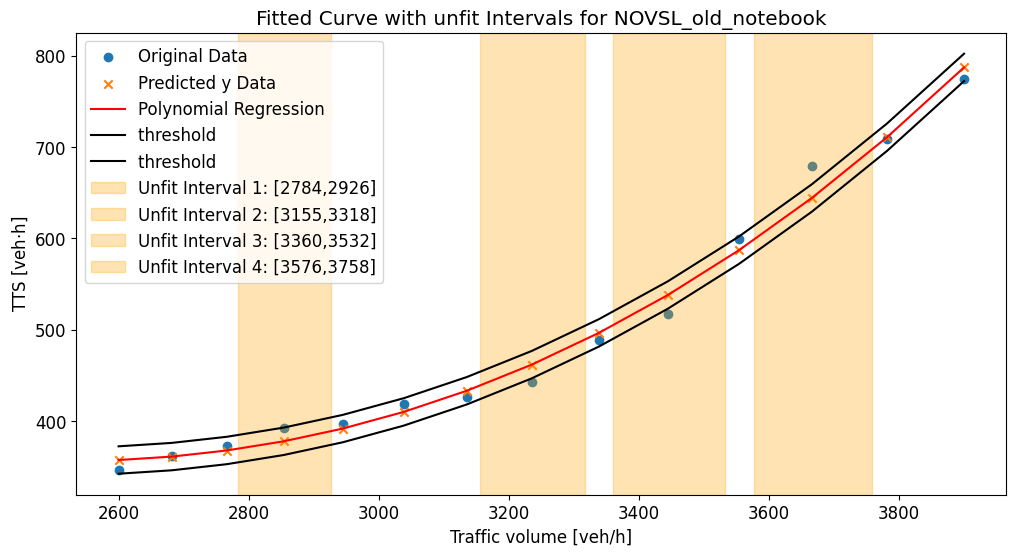

MAIN interval list from VAL: [[2783.6923076923076, 2926.4615384615386], [3155.3846153846152, 3317.846153846154], [3359.6923076923076, 3532.0], [3576.3076923076924, 3758.4615384615386]]
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2783.6923076923076, 2926.4615384615386)
[MODC]: mod_ticks:  [2800, 2875]
Temp x: [2800, 2875]
[MODC]: mod_x:  [2800.0, 2875.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3155.3846153846152, 3317.846153846154)
[MODC]: mod_ticks:  [3175, 3250]
Temp x: [3175, 3250]
[MODC]: mod_x:  [3175.0, 3250.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3359.6923076923076, 3532.0)
[MODC]: mod_ticks:  [3400, 3475]
Temp x: [3400, 3475]
[MODC]: mod_x:  [3400.0, 3475.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3576.3076923076924, 3758.4615384615386)
[MODC]: mod_ticks:  [3625, 3700]
Temp x: [3625, 3700]
[MODC]: mod_x:  [3625.0, 3700.0]
[MODC]: mod_x:  {2}
MAIN mod outcome ([[2800.0, 

Step #5400.00 (7ms ~= 35.71*RT, ~38571.43UPS, TraCI: 1ms, vehicles TOT 6449 ACT 270 BUF 0)


Step #4475.00 (10ms ~= 25.00*RT, ~54000.00UPS, TraCI: 1ms, vehicles TOT 6014 ACT 540 BUF 0

Step #5400.00 (6ms ~= 41.67*RT, ~45500.00UPS, TraCI: 1ms, vehicles TOT 6539 ACT 273 BUF 0)


Step #5400.00 (5ms ~= 50.00*RT, ~61000.00UPS, TraCI: 1ms, vehicles TOT 6809 ACT 305 BUF 0)


Step #5400.00 (5ms ~= 50.00*RT, ~59000.00UPS, TraCI: 0ms, vehicles TOT 6899 ACT 295 BUF 0)
Step #5400.00 (5ms ~= 50.00*RT, ~65000.00UPS, TraCI: 1ms, vehicles TOT 7079 ACT 325 BUF 0)
Step #5400.00 (8ms ~= 31.25*RT, ~52375.00UPS, TraCI: 1ms, vehicles TOT 7259 ACT 419 BUF 0)
Simulation output: [377.5555555555555, 387.11111111111103, 437.6666666666668, 455.2916666666667, 528.125, 534.6249999999999, 619.4027777777779, 710.0138888888889]
MODX [2800.0, 2875.0, 3175.0, 3250.0, 3400.0, 3475.0, 3625.0, 3700.0] and sim_y_list [377.5555555555555, 387.11111111111103, 437.6666666666668, 455.2916666666667, 528.125, 534.6249999999999, 619.4027777777779, 710.0138888888889]
MAIN modx [2800.0, 2875.0, 3175.0, 3250.0, 3400.0, 3475.0, 3625.0, 3700.0]
Validator...
What are POINTS  [[2800.0, 377.5555555555555], [2875.0, 387.11111111111103], [3175.0, 437.6666666666668], [3250.0, 455.2916666666667], [3400.0, 528.125], [3475.0, 534.6249999999999], [3625.0, 619.4027777777779], [3700.0, 710.0138888888889], [2853.

/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


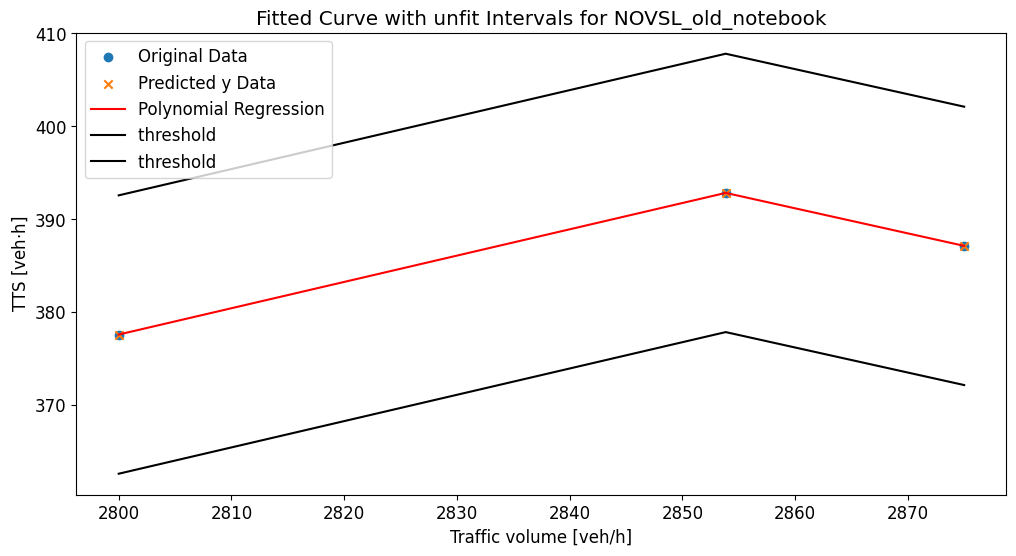

equation,
 y =  -1.3382878581778154e-17x^6  -1.7491005909795482e-16x^5 + 6.465784563323388e-11x^4 + 2.471932989406222e-07x^3 + 0.0005345582079846283x^2 + 0.04829125918241199x^1  -6870.03480264538 
unfit_points
 [(2800.0, 377.5555555555555), (2853.846153846154, 392.8194444444444), (2875.0, 387.11111111111103)] 
local_unfit_interval
, [[2783.6923076923076, 2926.4615384615386]]
       *** USING local_exploration_validator_A


/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


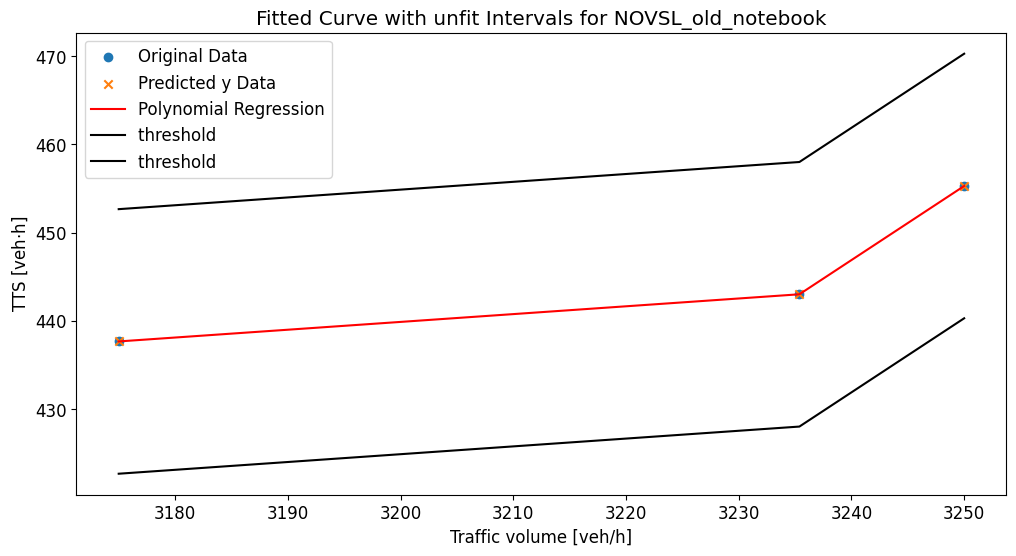

equation,
 y =  1.0912821857071951e-17x^6 + 2.249542088196525e-16x^5  -6.700823732558365e-11x^4  -2.889701203681211e-07x^3  -0.0006974477220207561x^2 + 0.017709553346528795x^1 + 12218.742147340736 
unfit_points
 [(3175.0, 437.6666666666668), (3235.3846153846152, 443.01388888888874), (3250.0, 455.2916666666667)] 
local_unfit_interval
, [[3155.3846153846152, 3317.846153846154]]
       *** USING local_exploration_validator_A


/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


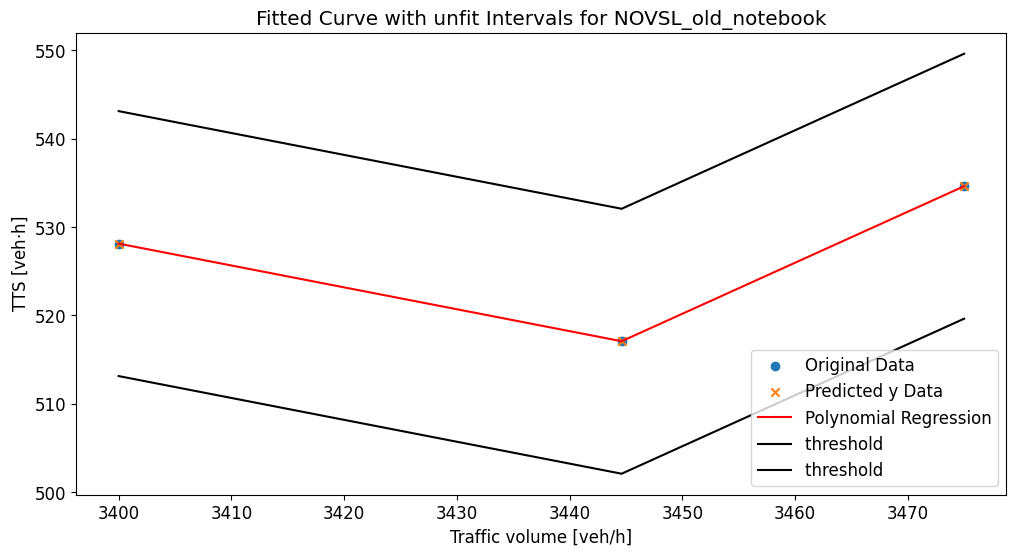

equation,
 y =  9.331516372350524e-18x^6 + 3.6392129532657836e-17x^5  -6.616173828245163e-11x^4  -3.034132666021465e-07x^3  -0.0007790990975002x^2 + 0.040982980507886034x^1 + 15730.052114508917 
unfit_points
 [(3400.0, 528.125), (3444.6153846153848, 517.0694444444443), (3475.0, 534.6249999999999)] 
local_unfit_interval
, [[3359.6923076923076, 3532.0]]
       *** USING local_exploration_validator_A


/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


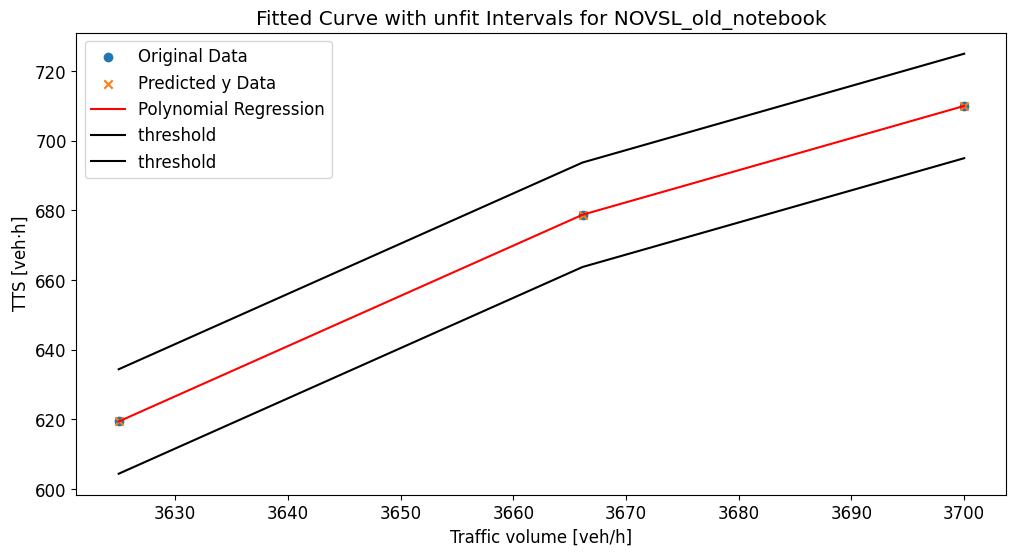

equation,
 y =  -4.885736794358829e-18x^6 + 3.7792380129615284e-16x^5 + 4.149646430050818e-11x^4 + 2.0013954141854335e-07x^3 + 0.0005461958239312003x^2  -0.017455731877545816x^1  -12344.197824800394 
unfit_points
 [(3625.0, 619.4027777777779), (3666.153846153846, 678.7777777777779), (3700.0, 710.0138888888889)] 
local_unfit_interval
, [[3576.3076923076924, 3758.4615384615386]]
DIFFERENCES 
each_interval  [3576.3076923076924, 3758.4615384615386] 
new_unfit_interval   []
MAIN interval list from VAL: []


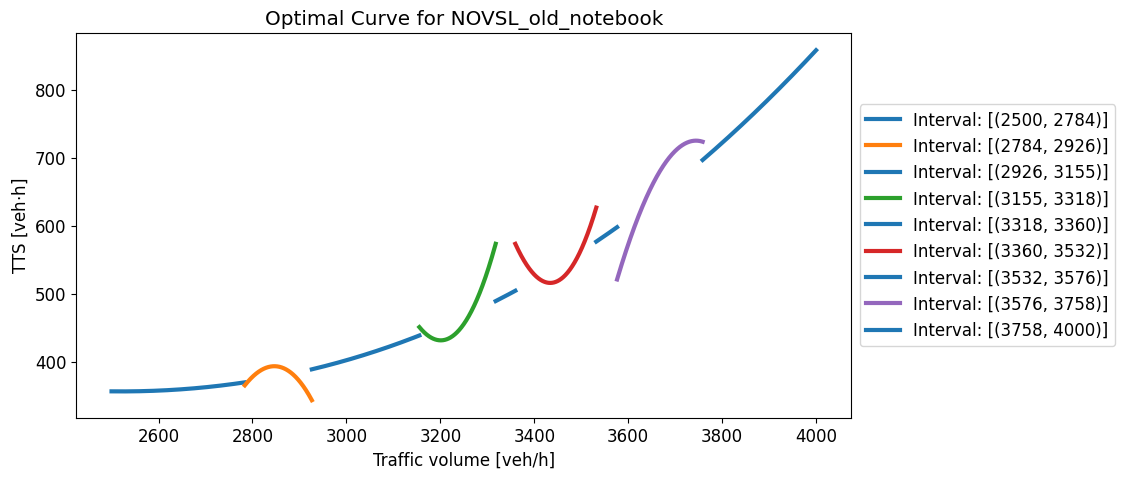

/home/amy/tmp/SimEx/notebooks/results_dir_NOVSL_old_notebook-20250106-110643/simex_output-NOVSL_old_notebook-20250106-110643.csv
Run finished. CSV file is /home/amy/tmp/SimEx/notebooks/results_dir_NOVSL_old_notebook-20250106-110643/simex_output-NOVSL_old_notebook-20250106-110643.csv
Run time: 11.415680130322775


In [2]:
from simulator import Simulator
from validator import Validator
from modifier import Modifier
from simex import run_simex
import time
before = time.time()
# Run simex
print("Running simex.")
base_file = run_simex(simulator_function=Simulator.sumo_simulator_novsl, modifier=Modifier.modifierA, validator=Validator.local_exploration_validator_A,instance_name='NOVSL_script')
print(f"Run finished. CSV file is {base_file}")

now = time.time()
print(f"Run time: {(now-before)/60}")